In [2]:
#Llamamos a las bibliotecas que voy a utilizar  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Leo el archivo a utilizar
df2 = pd.read_csv("vid18_180219.dat")

In [4]:
df1 = pd.DataFrame(df2) #Lo convierto a un DataFrame
#Creo un DataFrame nuevo con las columnas necesarias
df0=df1[['TIMESTAMP','AirTC_Avg']] 
df = pd.DataFrame(df0) 
df.head()

,TIMESTAMP,AirTC_Avg
0,2018-05-11 20:10:00,23.50
1,2018-05-11 20:20:00,22.96
2,2018-05-11 20:30:00,22.73
3,2018-05-11 20:40:00,22.40
4,2018-05-11 20:50:00,22.46


In [5]:
df.dtypes #Checo el tipo de variables que leo

TIMESTAMP     object
AirTC_Avg    float64
dtype: object

In [6]:
#Convierto la columna "TimeStamp" a una variable fecha
df['TIMESTAMP'] = pd.to_datetime(df.apply(lambda x: x['TIMESTAMP'],1), dayfirst=True)
#De esta nueva variable obtengo:
df['Año']=df['TIMESTAMP'].dt.year #Año
df['Mes']=df['TIMESTAMP'].dt.month #Mes
df['Dia']=df['TIMESTAMP'].dt.day #Día
df['Hora']=df['TIMESTAMP'].dt.hour #Hora

In [7]:
#Creo un nuevo DataFrame que empiece el 1 de Noviembre
uf = pd.DataFrame(df[df['TIMESTAMP']>="2018-11-1"])
uf = uf.reset_index(drop=True) #Reinicio el indice 
uf.tail()

,TIMESTAMP,AirTC_Avg,Año,Mes,Dia,Hora
15720,2019-02-18 06:50:00,3.699,2019,2,18,6
15721,2019-02-18 07:00:00,3.492,2019,2,18,7
15722,2019-02-18 07:10:00,3.387,2019,2,18,7
15723,2019-02-18 07:20:00,3.243,2019,2,18,7
15724,2019-02-18 07:30:00,3.552,2019,2,18,7


In [8]:
#Creo nuevas columnas con:
uf["Tprom"]=round(uf.groupby(['Año','Mes','Dia','Hora']).transform(np.mean),1) #La temperatura promedio por hora
uf["Tmax"]=round(uf.groupby(['Año','Mes','Dia'])['Tprom'].transform(np.max),1) #La temperatura maxima por dia
uf["Tmin"]=round(uf.groupby(['Año','Mes','Dia'])['Tprom'].transform(np.min),1) #La temperatura minima por dia 
uf.head()

,TIMESTAMP,AirTC_Avg,Año,Mes,Dia,Hora,Tprom,Tmax,Tmin
0,2018-11-01 00:00:00,9.13,2018,11,1,0,8.7,28.6,6.8
1,2018-11-01 00:10:00,8.89,2018,11,1,0,8.7,28.6,6.8
2,2018-11-01 00:20:00,8.66,2018,11,1,0,8.7,28.6,6.8
3,2018-11-01 00:30:00,8.52,2018,11,1,0,8.7,28.6,6.8
4,2018-11-01 00:40:00,8.47,2018,11,1,0,8.7,28.6,6.8


In [9]:
#Me deshago de las columnas innecesarias 
uf=uf.drop(['TIMESTAMP','AirTC_Avg'],1)
uf.tail()

,Año,Mes,Dia,Hora,Tprom,Tmax,Tmin
15720,2019,2,18,6,3.7,6.8,3.4
15721,2019,2,18,7,3.4,6.8,3.4
15722,2019,2,18,7,3.4,6.8,3.4
15723,2019,2,18,7,3.4,6.8,3.4
15724,2019,2,18,7,3.4,6.8,3.4


In [10]:
#Me deshago de los valores repetidos en las columnas
uf=uf.drop_duplicates(subset=['Año','Mes','Dia','Hora'])
uf = uf.reset_index(drop=True) #Reinicio el indice 
uf.head()

,Año,Mes,Dia,Hora,Tprom,Tmax,Tmin
0,2018,11,1,0,8.7,28.6,6.8
1,2018,11,1,1,8.5,28.6,6.8
2,2018,11,1,2,8.7,28.6,6.8
3,2018,11,1,3,8.8,28.6,6.8
4,2018,11,1,4,7.4,28.6,6.8


In [11]:
#Loop para contar las unidades de frio por dia 
UF=[]
for i in range (0,len(uf)):
    if(uf['Tprom'][i]< 1.5):
        UF.append(0)
    elif(1.5<=uf['Tprom'][i]<2.5):
        UF.append(0.5)
    elif(2.5<=uf['Tprom'][i]<9.2):
        UF.append(1.0)
    elif(9.2<=uf['Tprom'][i]<12.5):
        UF.append(0.5)
    elif(12.5<=uf['Tprom'][i]<16):
        UF.append(0.0)
    elif(16<=uf['Tprom'][i]<18):
        UF.append(-0.5)
    elif(uf['Tprom'][i]>=18):
        UF.append(-1.0)
uf['UF']=UF #Agrego los valores encontrados en el loop anterior a una nueva columna del DataFrame
uf.tail()

,Año,Mes,Dia,Hora,Tprom,Tmax,Tmin,UF
2618,2019,2,18,3,5.4,6.8,3.4,1.0
2619,2019,2,18,4,4.7,6.8,3.4,1.0
2620,2019,2,18,5,4.2,6.8,3.4,1.0
2621,2019,2,18,6,3.7,6.8,3.4,1.0
2622,2019,2,18,7,3.4,6.8,3.4,1.0


In [12]:
#Sumo los valores de las unidades de frio por dia 
uf["UF24"]=uf.groupby(['Año','Mes','Dia'])['UF'].transform("sum")
uf.head()

,Año,Mes,Dia,Hora,Tprom,Tmax,Tmin,UF,UF24
0,2018,11,1,0,8.7,28.6,6.8,1.0,-0.5
1,2018,11,1,1,8.5,28.6,6.8,1.0,-0.5
2,2018,11,1,2,8.7,28.6,6.8,1.0,-0.5
3,2018,11,1,3,8.8,28.6,6.8,1.0,-0.5
4,2018,11,1,4,7.4,28.6,6.8,1.0,-0.5


In [13]:
#Me deshago de los valores duplicados de las columnas 
uf24 = pd.DataFrame(uf.drop_duplicates(['Año','Mes','Dia']))
uf24.head()

,Año,Mes,Dia,Hora,Tprom,Tmax,Tmin,UF,UF24
0,2018,11,1,0,8.7,28.6,6.8,1.0,-0.5
24,2018,11,2,0,10.6,31.0,10.2,0.5,-9.0
48,2018,11,3,0,12.5,30.0,10.5,0.0,-9.5
72,2018,11,4,0,12.7,31.2,11.7,0.0,-11.5
96,2018,11,5,0,13.9,31.1,11.4,0.0,-8.0


In [14]:
#Me deshago de las columnas innecesarias 
uf24=uf24.drop(['Hora','UF'],1)
uf24.head()

,Año,Mes,Dia,Tprom,Tmax,Tmin,UF24
0,2018,11,1,8.7,28.6,6.8,-0.5
24,2018,11,2,10.6,31.0,10.2,-9.0
48,2018,11,3,12.5,30.0,10.5,-9.5
72,2018,11,4,12.7,31.2,11.7,-11.5
96,2018,11,5,13.9,31.1,11.4,-8.0


In [15]:
#Reinicio el indice
uf = uf.reset_index(drop=True) 
uf.head()

,Año,Mes,Dia,Hora,Tprom,Tmax,Tmin,UF,UF24
0,2018,11,1,0,8.7,28.6,6.8,1.0,-0.5
1,2018,11,1,1,8.5,28.6,6.8,1.0,-0.5
2,2018,11,1,2,8.7,28.6,6.8,1.0,-0.5
3,2018,11,1,3,8.8,28.6,6.8,1.0,-0.5
4,2018,11,1,4,7.4,28.6,6.8,1.0,-0.5


In [16]:
#Creo una nueva columna con la suma de los valores de las unidades de frio por dia
uf24['Sum_UF24']=np.cumsum(uf24['UF24'])
uf24 = uf24.reset_index(drop=True) 
uf24.head()

,Año,Mes,Dia,Tprom,Tmax,Tmin,UF24,Sum_UF24
0,2018,11,1,8.7,28.6,6.8,-0.5,-0.5
1,2018,11,2,10.6,31.0,10.2,-9.0,-9.5
2,2018,11,3,12.5,30.0,10.5,-9.5,-19.0
3,2018,11,4,12.7,31.2,11.7,-11.5,-30.5
4,2018,11,5,13.9,31.1,11.4,-8.0,-38.5


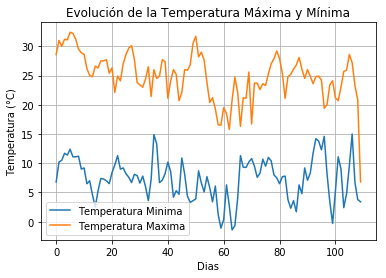

In [17]:
#Grafica de la evolucion de temperaturas maxima y minima 
x=np.arange(len(uf24['Dia'])) #Le asigno el valor a x con el rango de los dias 
y1=uf24['Tmin'] #En y1 guardo los valores de las temperaturas minimas
y2=uf24['Tmax'] #En y2 guardo los valores de las temperaturas maximas 
plt.plot(x, y1) #Grafico x vs. y1
plt.plot(x, y2) #Grafico x vs. y2
plt.legend(["Temperatura Minima","Temperatura Maxima"],loc='best') #Agrego una leyenda a la grafica
plt.title("Evolución de la Temperatura Máxima y Mínima") #Titulo de la grafica
plt.ylabel("Temperatura (°C)") #Nombre del eje y
plt.xlabel("Dias") #Nombre del eje x
plt.grid(True)
plt.show()

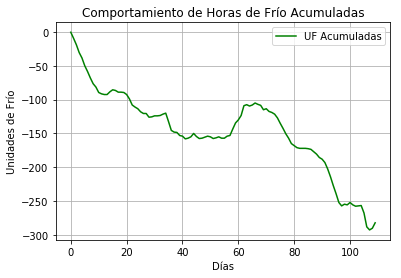

In [18]:
#Grafica del comportamiento de horas de frio acumuladas
x=np.arange(len(uf24['Dia'])) #Agrego el rango del total de dias a la variable x
y=uf24['Sum_UF24'] #Le asigno los valores de "Sum_UF24" a la variable y
plt.plot(x, y,color='g') #Grafico x vs. y con una linea de color verde
plt.legend(["UF Acumuladas"],loc='best') #Agrego una leyenda a la grafica
plt.title("Comportamiento de Horas de Frío Acumuladas") #Agrego el titulo a la grafica
plt.ylabel("Unidades de Frío") #Nombre del eje y
plt.xlabel("Días") #Nombre del eje x
plt.grid(True)
plt.show()

**Ahora utilizare el modelo de INIFAP-CECH para el analisis de horas frias efectivas y al final comparare ambos modelos**

In [19]:
#Primero creo un nuevo DataFrame partiendo de uno que ya tenia previamente 
#para trabajar ahora con este y no modificar el anterior
gr=pd.DataFrame(uf)
gr.head()

,Año,Mes,Dia,Hora,Tprom,Tmax,Tmin,UF,UF24
0,2018,11,1,0,8.7,28.6,6.8,1.0,-0.5
1,2018,11,1,1,8.5,28.6,6.8,1.0,-0.5
2,2018,11,1,2,8.7,28.6,6.8,1.0,-0.5
3,2018,11,1,3,8.8,28.6,6.8,1.0,-0.5
4,2018,11,1,4,7.4,28.6,6.8,1.0,-0.5


In [20]:
#Loop para contar las horas frias y calientes por hora 
HF=[] #Arreglo Hora Fria
HC=[] #Arreglo Hora Caliente
for j in range(0,len(gr)):
    if(0<gr['Tprom'][j] <= 10): #Cuando la temperatura esta entre 0°C y 10°C se clasifica como Hora Fria
        HF.append(1) #Se guarda un 1 en HF
        HC.append(0) #Se guarda un 0 en HC
    elif(gr['Tprom'][j] >= 25): #Cuando la temperatura el mayor a 25°C se clasifica como Hora Caliente
        HF.append(0) #Se guarda un 0 en HF
        HC.append(1) #Se guarda un 1 en HC
    else:  #SI no cumple ninguna de las condiciones anteriores se guarda 0 en ambos arreglos 
        HC.append(0)
        HF.append(0)
        
#Agrego los valores encontrados en el loop anterior a una nueva columna del DataFrame
gr['HC']=HC 
gr['HF']=HF
gr.head(12)

,Año,Mes,Dia,Hora,Tprom,Tmax,Tmin,UF,UF24,HC,HF
0,2018,11,1,0,8.7,28.6,6.8,1.0,-0.5,0,1
1,2018,11,1,1,8.5,28.6,6.8,1.0,-0.5,0,1
2,2018,11,1,2,8.7,28.6,6.8,1.0,-0.5,0,1
3,2018,11,1,3,8.8,28.6,6.8,1.0,-0.5,0,1
4,2018,11,1,4,7.4,28.6,6.8,1.0,-0.5,0,1
5,2018,11,1,5,7.3,28.6,6.8,1.0,-0.5,0,1
6,2018,11,1,6,6.8,28.6,6.8,1.0,-0.5,0,1
7,2018,11,1,7,8.1,28.6,6.8,1.0,-0.5,0,1
8,2018,11,1,8,15.0,28.6,6.8,0.0,-0.5,0,0
9,2018,11,1,9,19.7,28.6,6.8,-1.0,-0.5,0,0


In [21]:
gr["HC24"]=gr.groupby(['Año','Mes','Dia'])['HC'].transform("sum") #Sumamos los datos de HC de un solo dia para obtener el total
                                                                  #de horas frias por dia
gr["HF24"]=gr.groupby(['Año','Mes','Dia'])['HF'].transform("sum") #Sumamos los datos de HF  que corresponden a un solo dia 
                                                                  #para obtener el total de horas calientes por dia
gr.head()

,Año,Mes,Dia,Hora,Tprom,Tmax,Tmin,UF,UF24,HC,HF,HC24,HF24
0,2018,11,1,0,8.7,28.6,6.8,1.0,-0.5,0,1,6,8
1,2018,11,1,1,8.5,28.6,6.8,1.0,-0.5,0,1,6,8
2,2018,11,1,2,8.7,28.6,6.8,1.0,-0.5,0,1,6,8
3,2018,11,1,3,8.8,28.6,6.8,1.0,-0.5,0,1,6,8
4,2018,11,1,4,7.4,28.6,6.8,1.0,-0.5,0,1,6,8


In [22]:
gr=gr.drop_duplicates(subset=['Año','Mes','Dia']) #Me deshago de los valores duplicados de un dia
gr=gr.drop(['HC','HF','Hora'],1) #Me deshago de las columnas del DataFrame que ya no utilizare
gr = gr.reset_index(drop=True) #Reinicio el indice 
gr.head()

,Año,Mes,Dia,Tprom,Tmax,Tmin,UF,UF24,HC24,HF24
0,2018,11,1,8.7,28.6,6.8,1.0,-0.5,6,8
1,2018,11,2,10.6,31.0,10.2,0.5,-9.0,8,0
2,2018,11,3,12.5,30.0,10.5,0.0,-9.5,8,0
3,2018,11,4,12.7,31.2,11.7,0.0,-11.5,8,0
4,2018,11,5,13.9,31.1,11.4,0.0,-8.0,8,0


In [23]:
gr['HFE']= gr['HF24'] - gr['HC24'] #Realizo el calculo de las Horas de Frio Efectivas (HFE)
gr.head()

,Año,Mes,Dia,Tprom,Tmax,Tmin,UF,UF24,HC24,HF24,HFE
0,2018,11,1,8.7,28.6,6.8,1.0,-0.5,6,8,2
1,2018,11,2,10.6,31.0,10.2,0.5,-9.0,8,0,-8
2,2018,11,3,12.5,30.0,10.5,0.0,-9.5,8,0,-8
3,2018,11,4,12.7,31.2,11.7,0.0,-11.5,8,0,-8
4,2018,11,5,13.9,31.1,11.4,0.0,-8.0,8,0,-8


In [24]:
#Creo un nuevo DataFrame para comparar los valores por dia de cada modelo
comp=pd.DataFrame(uf24) #Lo hago a partir de un DataFrame creado anteriormente para modificar este y no modificar el anterior
comp['HFE']=gr['HFE'] #Del DataFrame "gr" tomo la columna de HFE y la pongo en este nuevo 
comp.head()

,Año,Mes,Dia,Tprom,Tmax,Tmin,UF24,Sum_UF24,HFE
0,2018,11,1,8.7,28.6,6.8,-0.5,-0.5,2
1,2018,11,2,10.6,31.0,10.2,-9.0,-9.5,-8
2,2018,11,3,12.5,30.0,10.5,-9.5,-19.0,-8
3,2018,11,4,12.7,31.2,11.7,-11.5,-30.5,-8
4,2018,11,5,13.9,31.1,11.4,-8.0,-38.5,-8


In [25]:
comp['Sum_HFE']=np.cumsum(comp['HFE']) #Realizo la suma de acumulativa de HFE's
comp.head()

,Año,Mes,Dia,Tprom,Tmax,Tmin,UF24,Sum_UF24,HFE,Sum_HFE
0,2018,11,1,8.7,28.6,6.8,-0.5,-0.5,2,2
1,2018,11,2,10.6,31.0,10.2,-9.0,-9.5,-8,-6
2,2018,11,3,12.5,30.0,10.5,-9.5,-19.0,-8,-14
3,2018,11,4,12.7,31.2,11.7,-11.5,-30.5,-8,-22
4,2018,11,5,13.9,31.1,11.4,-8.0,-38.5,-8,-30


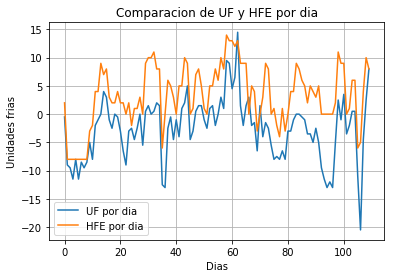

In [26]:
#Grafica de la evolucion de temperaturas maxima y minima 
x=np.arange(len(comp['Dia'])) #Le asigno el valor a x con el rango de los dias 
y1=comp['UF24'] #En y1 guardo los valores de las Unidades de Frio por dia
y2=comp['HFE'] #En y2 guardo los valores de las Horas de Frio Efectivas
plt.plot(x, y1) #Grafico x vs. y1
plt.plot(x, y2) #Grafico x vs. y2
plt.legend(["UF por dia","HFE por dia"],loc='best') #Agrego una leyenda a la grafica
plt.title("Comparacion de UF y HFE por dia") #Titulo de la grafica
plt.ylabel("Unidades frias") #Nombre del eje y
plt.xlabel("Dias") #Nombre del eje x
plt.grid(True)
plt.show()

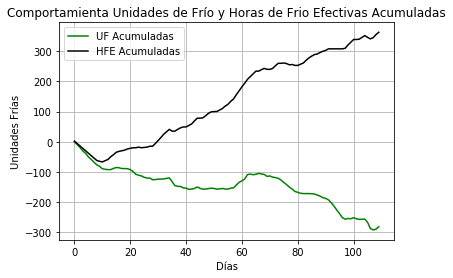

In [28]:
#Grafica del comportamiento de horas de frio acumuladas
x=np.arange(len(comp['Dia'])) #Agrego el rango del total de dias a la variable x
y1=comp['Sum_UF24'] #Le asigno los valores de "Sum_UF24" a la variable y1
y2=comp['Sum_HFE'] #Le asigno los valores de "Sum_HFE" a la variable y2
plt.plot(x, y1,color='g') #Grafico x vs. y1 con una linea de color verde
plt.plot(x, y2,color='k') #Grafico x vs. y2 con una linea de color negra
plt.legend(["UF Acumuladas","HFE Acumuladas"],loc='best') #Agrego una leyenda a la grafica
plt.title("Comportamienta Unidades de Frío y Horas de Frio Efectivas Acumuladas") #Agrego el titulo a la grafica
plt.ylabel("Unidades Frías") #Nombre del eje y
plt.xlabel("Días") #Nombre del eje x
plt.grid(True)
plt.show()